# Ideas
* Embed the descriptions
* Embed the genres?
* In addition to similarity search, also filter by metadata (author, rating, genres, first publishing, awards, etc.)
* ML classifier that predicts if you will like it. Inputs are the similarity search (e.g. distance) and the metadata.
* Heuristic for popularity: number of ratings x rating
* Maybe the chatbot can provide a few options: most popular, most similar to your request, etc.

# <u>What did I do?</u>
* I filtered by English-language books only - I should add back in the other languages
* I replaced null `description` in the dataframe with "No description available."
* I removed `[` and `]` from the `genres` strings
* I concatenated `description` and `genres` into a new field `descriptor`
* I checked the character lengths of `descriptor`
* I saved the dataframe to pickle file

# <u>Next steps</u>
* Clean up the genres - map super-specific genres to more general genres

In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("books_1.Best_Books_Ever.csv")
# df = df.loc[df['language'] == "English"]
# df = pd.read_pickle("bbe_12-02-2024-1557.pkl")

In [49]:
df['language'].value_counts()[:20]

language
English                  42661
Arabic                    1038
Spanish                    687
French                     579
German                     528
Indonesian                 371
Portuguese                 363
Italian                    255
Dutch                      215
Turkish                    211
Persian                    164
Polish                     138
Greek, Modern (1453-)      112
Russian                     98
Swedish                     94
Japanese                    94
Romanian                    93
Bengali                     84
Malay                       74
Bulgarian                   70
Name: count, dtype: int64

In [12]:
df.head(1)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09


In [13]:
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [46]:
import re

np.where(df["title"].apply(lambda x: re.search(r"Harry Potter", x)))

(array([    1,    32,    71,    93,   103,   105,   126,   409,  1332,
         1600,  2286,  2580,  3576,  6600,  7008,  7418, 11030, 12386,
        13817, 17744, 25596, 33871, 34781, 40794, 40815]),)

In [42]:
np.where(df["title"] == "Circe")

(array([1444]),)

In [47]:
idx = 32
print(f"Title: {df.iloc[idx].title}\n")
print(f"Series: {df.iloc[idx].series}\n")
print(f"Author: {df.iloc[idx].author}\n")
print(f"Description: {df.iloc[idx].description}\n")
print(f"Genres: {df.iloc[idx].genres}\n")
print(f"Number of pages: {df.iloc[idx].pages}\n")
print(f"Awards: {df.iloc[idx].awards}\n")
print(f"Number of ratings: {df.iloc[idx].numRatings}\n")
print(f"Rating: {df.iloc[idx].rating}\n")
print(f"Ratings by stars: {df.iloc[idx].ratingsByStars}\n")
print(f"Liked %: {df.iloc[idx].likedPercent}\n")
print(f"BBE score: {df.iloc[idx].bbeScore}\n")
print(f"BBE votes: {df.iloc[idx].bbeVotes}\n")

Title: Harry Potter and the Sorcerer's Stone

Series: Harry Potter #1

Author: J.K. Rowling, Mary GrandPré (Illustrator)

Description: Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secr

# <u>How do I deal with null entries?</u>
* description - can't embed, but you should still keep these in the DB
* For numerical fields, you'll have to find some graceful way to handle. At least number of ratings and rating has valid entries for every entry.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [15]:
df.loc[df['description'].isnull()].sort_values(by='numRatings', ascending=False).head(1)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
752,1923820.Holy_Bible,Holy Bible: King James Version,NaN,Anonymous,4.41,NaN,English,9999999999999,"['Religion', 'Classics', 'Nonfiction', 'Christ...","['Barabbas', 'Lucifer', 'Moses (Bible)', 'Job'...",...,10/28/11,[],220480,"['163526', '19150', '15419', '9056', '13329']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,9711,121,NaN


In [16]:
type(df['genres'].iloc[0])
types = [type(x) for x in df['genres']]

In [17]:
types = df['genres'].apply(type)
print(sum(types == str))
print(len(types))

52478
52478


# Concatenate description and genres

In [19]:
import re

In [20]:
cleanup = re.compile(r"\[|\]|'")

In [21]:
df['genres'] = df['genres'].apply(lambda x: re.sub(cleanup, "", x))
df['genres'].head()

0    Young Adult, Fiction, Dystopia, Fantasy, Scien...
1    Fantasy, Young Adult, Fiction, Magic, Children...
2    Classics, Fiction, Historical Fiction, School,...
3    Classics, Fiction, Romance, Historical Fiction...
4    Young Adult, Fantasy, Romance, Vampires, Ficti...
Name: genres, dtype: object

In [22]:
re.split(r",\s*", df['genres'].iloc[0])

['Young Adult',
 'Fiction',
 'Dystopia',
 'Fantasy',
 'Science Fiction',
 'Romance',
 'Adventure',
 'Teen',
 'Post Apocalyptic',
 'Action']

In [23]:
# df['genres_list'] = df['genres'].apply(lambda x: re.split(",", re.sub(r"\s+", "", x)))
df['genres_list'] = df['genres'].apply(lambda x: re.split(r",\s*", x))
df['genres_list'].head()

0    [Young Adult, Fiction, Dystopia, Fantasy, Scie...
1    [Fantasy, Young Adult, Fiction, Magic, Childre...
2    [Classics, Fiction, Historical Fiction, School...
3    [Classics, Fiction, Romance, Historical Fictio...
4    [Young Adult, Fantasy, Romance, Vampires, Fict...
Name: genres_list, dtype: object

In [24]:
# genres_total = []
# for idx in range(len(df['genres_list'])):
#     genres_total = genres_total + df['genres_list'].iloc[idx]

from itertools import chain

genres_total = list(chain.from_iterable(df['genres_list']))

genres_set = list(set(genres_total))
print(genres_set)

['', 'Rock N Roll', 'Design', 'Stories', 'Christian Non Fiction', 'Harlequin Romance', 'Human Resources', 'Elves', 'Academic', 'The World', 'Strippers', 'African American Romance', 'Own', 'Belief', 'Albanian Literature', 'Chapter Books', 'Ghost Stories', 'Jokes', 'Serbian Literature', 'Reverse Harem', 'Food and Drink', 'Satanism', 'Art and Photography', 'Christian Fiction', 'Us Presidents', 'Mysticism', 'Google', 'Fitness', 'Cultural', 'Menage', 'Military Romance', 'Finnish Literature', 'Social Movements', 'Aircraft', 'Unicorns', 'Creation Science', 'Academics', 'Traditional Regency', 'Journal', 'Harlequin', 'Yeti', 'Baha I', 'Adult', 'World Of Warcraft', 'Multicultural Literature', 'Post Apocalyptic', 'Paranormal', 'How To', 'France', 'Entrepreneurship', 'Self Help', 'Football', 'Surreal', 'Arthurian', 'Paranormal Urban Fantasy', 'Scotland', 'Utopia', 'Urban', 'Skepticism', 'Graphic Novels Manga', 'International Development', 'Family', 'Mormonism', 'Mixed Martial Arts', 'Climate Chang

In [25]:
genres_total = pd.DataFrame(genres_total)

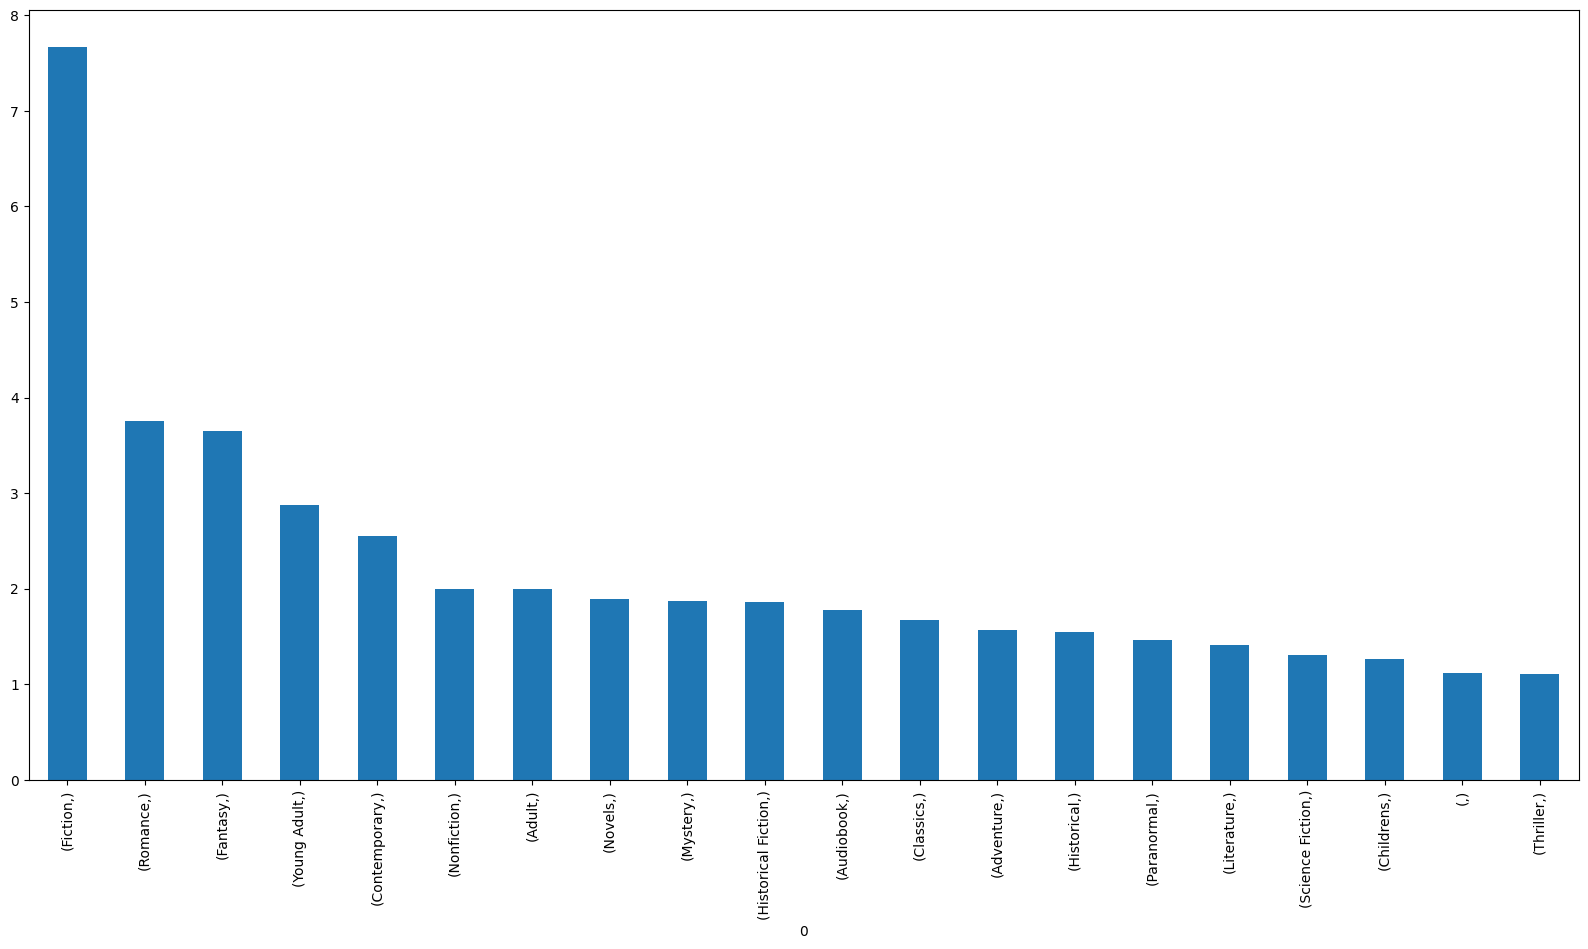

In [36]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
# genres_count = genres_total.value_counts()
# genres_count[genres_count > 5000].plot.bar()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
genres_count = genres_total.value_counts()/len(genres_total)*100
genres_count[:20].plot.bar()
genres_count.to_csv("genres_count.csv")

In [19]:
df["description"] = df["description"].fillna("No description available.")
df["genres"] = df["genres"].fillna("No genres listed.")

In [21]:
print(f"Description: {df.iloc[0].description}\nGenres: {df.iloc[0].genres}")

Description: WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.
Genres: Young Adult, Fiction, Dystopia, Fantasy, Science Fiction, Romance, Adventure, Teen, Post Apocalyptic, Action


In [22]:
df["descriptor"] = df.apply(lambda x: f"Description: {x.description}\nGenres: {x.genres}", axis=1)

In [23]:
for idx in range(5):
    print(df["descriptor"].iloc[idx])
    print("------------------------------------------------")

Description: WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.
Genres: Young Adult, Fiction, Dystopia, Fantasy, Science Fiction, Romance, Adventure, Teen, Post Apocalyptic, Action
----------------------------

In [24]:
df_no_description = df.loc[df["description"] == "No description available."]

In [25]:
for idx in range(5):
    print(df_no_description["descriptor"].iloc[idx])
    print("------------------------------------------------")

Description: No description available.
Genres: Poetry, Classics, Fiction, Literature, American, 19th Century, Philosophy, Classic Literature, School, The United States Of America
------------------------------------------------
Description: No description available.
Genres: Poetry, Classics, Fiction, American, Literature, LGBT, 20th Century, Queer, Banned Books, School
------------------------------------------------
Description: No description available.
Genres: Religion, Nonfiction, Lds, Church, Spirituality, History, Inspirational, Classics, Reference, Christian
------------------------------------------------
Description: No description available.
Genres: Religion, Classics, Nonfiction, Christian, Christianity, History, Philosophy, Reference, Spirituality, Theology
------------------------------------------------
Description: No description available.
Genres: Fiction, Classics, Novels, Literature, Contemporary, Literary Fiction, New York, American, 20th Century, Humor
-------------

In [26]:
df["descriptor_lengths"] = df["descriptor"].apply(len)

In [27]:
df["descriptor_lengths"].describe()

count    42661.000000
mean       973.198167
std        542.042843
min         27.000000
25%        638.000000
50%        915.000000
75%       1206.000000
max      24755.000000
Name: descriptor_lengths, dtype: float64

In [28]:
df.loc[df["descriptor_lengths"] > 10000]

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,genres_list,descriptor,descriptor_lengths
18912,17857619-spiritus-mundi,Spiritus Mundi,Spiritus Mundi #1,Robert Sheppard (Goodreads Author),4.00,"Spiritus Mundi by Robert Sheppard, nominated f...",English,9999999999999,,[],...,"['7', '4', '1', '0', '2']",86.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,NaN,[],Description: Spiritus Mundi by Robert Sheppard...,24755
22017,17857704-spiritus-mundi---the-romance,Spiritus Mundi - The Romance,Spiritus Mundi #2,Robert Sheppard (Goodreads Author),3.92,"Spiritus Mundi by Robert Sheppard, nominated f...",English,B00CGM8BZG,,[],...,"['6', '4', '1', '0', '2']",85.0,[],https://i.gr-assets.com/images/S/compressed.ph...,99,1,NaN,[],Description: Spiritus Mundi by Robert Sheppard...,24755
51533,332100.Hamlet_as_Told_on_the_Street,Hamlet as Told on the Street,NaN,Shel Silverstein,3.71,"Now Francisco and Bernardo, they was guardin’ ...",English,9999999999999,"Poetry, Fiction, Childrens, Humor, American, S...",[],...,"['187', '171', '154', '85', '13']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,18,1,NaN,"[Poetry, Fiction, Childrens, Humor, American, ...","Description: Now Francisco and Bernardo, they ...",15648


<Axes: >

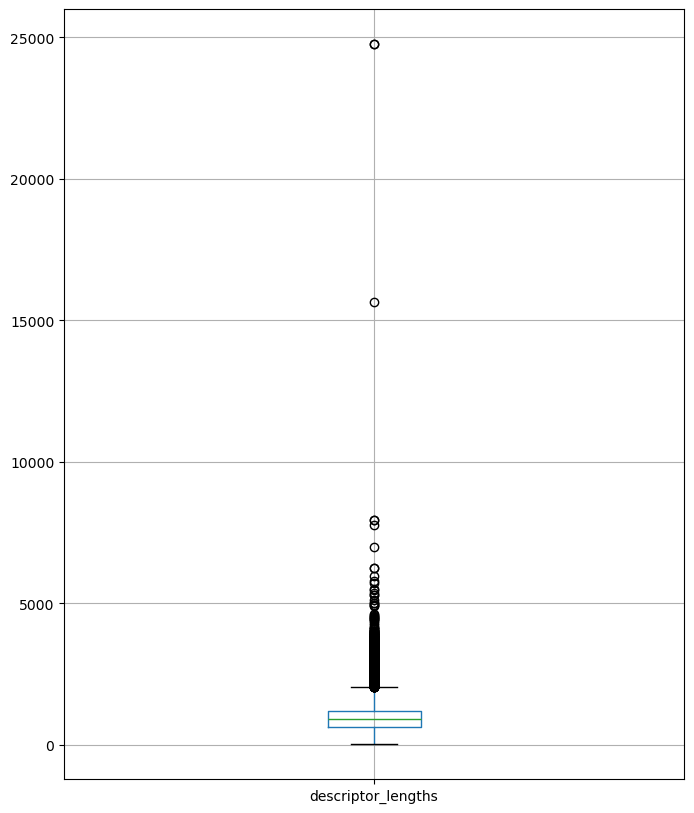

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
df.boxplot(column=["descriptor_lengths"])
# plt.yticks(range(0,2500,100))
# plt.axhline(1024)
# plt.ylim([0, 2500])

In [30]:
df["description_lengths"] = df["description"].apply(len)
df["description_lengths"].describe()

count    42661.000000
mean       855.862240
std        539.192642
min          3.000000
25%        522.000000
50%        794.000000
75%       1083.000000
max      24733.000000
Name: description_lengths, dtype: float64

<Axes: >

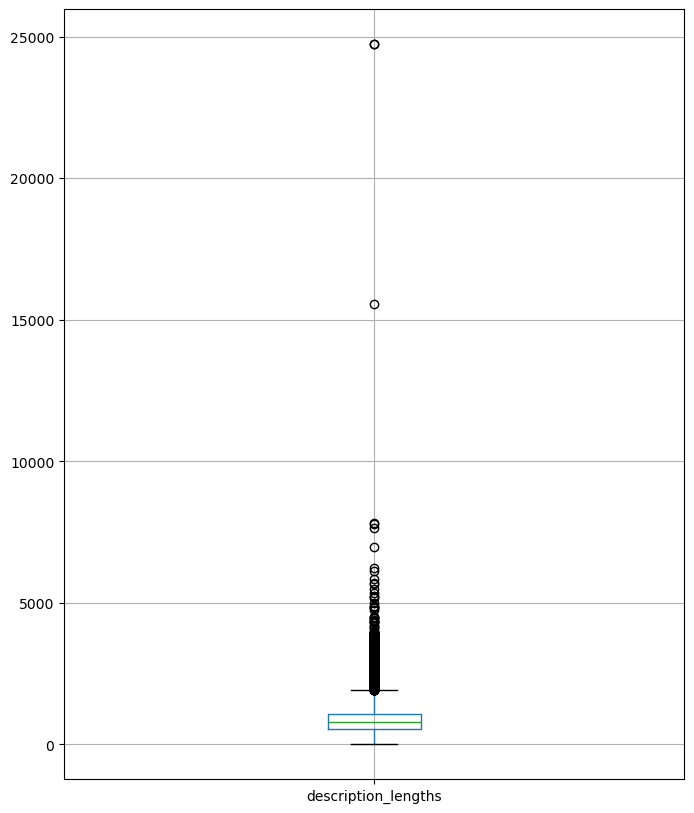

In [31]:
plt.figure(figsize=(8,10))
df.boxplot(column=["description_lengths"])

In [32]:
df.loc[df["description_lengths"] < 50].head(1)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,genres_list,descriptor,descriptor_lengths,description_lengths
291,27494.Leaves_of_Grass,Leaves of Grass,NaN,Walt Whitman,4.12,No description available.,English,9999999999999,"Poetry, Classics, Fiction, Literature, America...",[],...,93.0,"['New York City, New York (United States)', 'W...",https://i.gr-assets.com/images/S/compressed.ph...,43537,591,NaN,"[Poetry, Classics, Fiction, Literature, Americ...",Description: No description available.\nGenres...,178,25


In [33]:
df["genre_lengths"] = df["genres"].apply(len)
df["genre_lengths"].describe()

count    42661.000000
mean        95.335927
std         39.404644
min          0.000000
25%         93.000000
50%        110.000000
75%        119.000000
max        176.000000
Name: genre_lengths, dtype: float64

<Axes: >

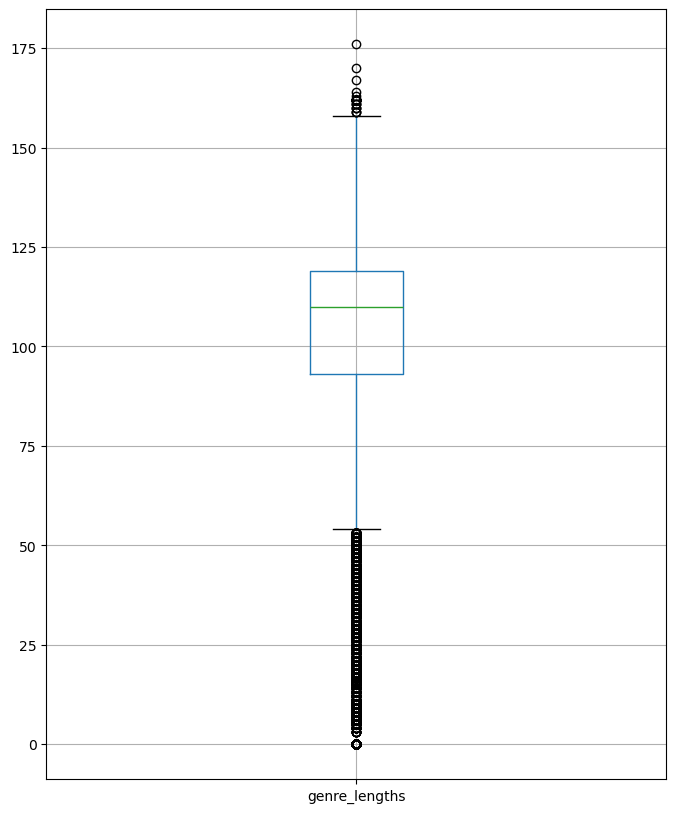

In [34]:
plt.figure(figsize=(8,10))
df.boxplot(column=["genre_lengths"])

In [35]:
df.loc[df["genre_lengths"] < 5].head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,setting,coverImg,bbeScore,bbeVotes,price,genres_list,descriptor,descriptor_lengths,description_lengths,genre_lengths
1483,26030383-beg-for-mercy,Beg For Mercy,Mercy #3,Lucian Bane (Goodreads Author),4.29,"The fight is on in this installment, Mercy is ...",English,9999999999999,,[],...,[],https://i.gr-assets.com/images/S/compressed.ph...,3246,33,NaN,[],Description: The fight is on in this installme...,492,470,0
2182,55196363-complicated-moonlight,Complicated Moonlight,DCYE #2,Lynessa Layne (Goodreads Author),4.79,"In the second installment of the DCYE series, ...",English,B08H1JHDJN,,[],...,[],https://i.gr-assets.com/images/S/compressed.ph...,1784,18,NaN,[],Description: In the second installment of the ...,729,707,0
2272,24536832-song-bird,Song Bird: Matters of the Heart,NaN,Christine M. Knight (Goodreads Author),4.55,"“I’m not Mavis anymore.” For years, song bird ...",English,9780987434869,,[],...,[],https://i.gr-assets.com/images/S/compressed.ph...,1685,17,18.5,[],Description: “I’m not Mavis anymore.” For year...,960,938,0
2526,45719695-jubal-s-field-trip-to-heaven,Jubal's Field Trip To Heaven: Jubal and Chanan...,NaN,Ginger Baum,4.97,This is an adventurous story about an 11-year-...,English,B07RK1ZQL6,,[],...,[],https://i.gr-assets.com/images/S/compressed.ph...,1465,15,NaN,[],Description: This is an adventurous story abou...,915,893,0
3023,40949958-treacherous-estate,Treacherous Estate,NaN,Behcet Kaya (Goodreads Author),4.32,While enjoying his usual Friday night after di...,English,9781722829698,,[],...,[],https://i.gr-assets.com/images/S/compressed.ph...,1140,13,14.82,[],Description: While enjoying his usual Friday n...,693,671,0


In [36]:
df.to_pickle("bbe_12-05-2024-2236.pkl")

In [37]:
df = pd.read_pickle("bbe_12-05-2024-2236.pkl")
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price', 'genres_list', 'descriptor',
       'descriptor_lengths', 'description_lengths', 'genre_lengths'],
      dtype='object')

In [38]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,setting,coverImg,bbeScore,bbeVotes,price,genres_list,descriptor,descriptor_lengths,description_lengths,genre_lengths
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"Young Adult, Fiction, Dystopia, Fantasy, Scien...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Description: WINNING MEANS FAME AND FORTUNE.LO...,971,841,108
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"Fantasy, Young Adult, Fiction, Magic, Children...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Description: There is a door at the end of a s...,945,805,118
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"Classics, Fiction, Historical Fiction, School,...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,"[Classics, Fiction, Historical Fiction, School...",Description: The unforgettable novel of a chil...,956,814,120
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"Classics, Fiction, Romance, Historical Fiction...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,"[Classics, Fiction, Romance, Historical Fictio...",Description: Alternate cover edition of ISBN 9...,795,648,125
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"Young Adult, Fantasy, Romance, Vampires, Ficti...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Description: About three things I was absolute...,478,341,115


In [40]:
df.insert(0, "ID", np.array(range(len(df))))
df.head()

,ID,bookId,title,series,author,rating,description,language,isbn,genres,...,setting,coverImg,bbeScore,bbeVotes,price,genres_list,descriptor,descriptor_lengths,description_lengths,genre_lengths
0,0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"Young Adult, Fiction, Dystopia, Fantasy, Scien...",...,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Description: WINNING MEANS FAME AND FORTUNE.LO...,971,841,108
1,1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"Fantasy, Young Adult, Fiction, Magic, Children...",...,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Description: There is a door at the end of a s...,945,805,118
2,2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"Classics, Fiction, Historical Fiction, School,...",...,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,"[Classics, Fiction, Historical Fiction, School...",Description: The unforgettable novel of a chil...,956,814,120
3,3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"Classics, Fiction, Romance, Historical Fiction...",...,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,"[Classics, Fiction, Romance, Historical Fictio...",Description: Alternate cover edition of ISBN 9...,795,648,125
4,4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"Young Adult, Fantasy, Romance, Vampires, Ficti...",...,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Description: About three things I was absolute...,478,341,115


In [41]:
df["ID"]

0            0
1            1
2            2
3            3
4            4
         ...  
52473    42656
52474    42657
52475    42658
52476    42659
52477    42660
Name: ID, Length: 42661, dtype: int64

In [42]:
df.to_pickle("bbe_12-05-2024-2236.pkl")